

# **"Sentiment Analysis of Virtual Reality Headset Reviews: Leveraging Hugging Face Transformers"**

**Introduction:**:

In recent years, the popularity of ***Virtual Reality (VR)*** technology has surged, making it essential for consumers to navigate the vast array of products available in the market. To understand ***consumer sentiment towards VR headsets***, I embarked on a project to ***scrape reviews from Amazon using*** ***Beautiful Soup***, focusing specifically on this category due to its rapid growth and the increasing consumer interest. Sentiment analysis plays a crucial role in discerning public opinion, allowing businesses to gain insights into customer experiences, preferences, and pain points. This project harnesses the power of sentiment analysis to categorize reviews into positive, neutral, and negative sentiments, revealing trends that can inform product development and marketing strategies.

Utilizing the ***Hugging Face Transformers library***, I leveraged a ***pre-trained model***, which offers a robust starting point for natural language processing tasks. Pre-trained models save time and computational resources, and they come with the advantage of having already learned rich representations from vast datasets. I further ***fine-tuned*** this model on my annotated dataset of VR headset reviews, optimizing its performance for my specific application. By combining ***advanced NLP techniques*** with practical insights from user feedback, this project illustrates the profound impact sentiment analysis can have in enhancing the consumer experience within the burgeoning field of Virtual Reality. For comprehensive guidance on utilizing transformer models in NLP, I referenced the book "Natural Language Processing with Transformers: Building Language Applications with Hugging Face," which provided invaluable insights into this cutting-edge technology.


***REF: Natural Language Processing with Transformers Building Language Applications with Hugging Face by Lewis Tunstall, Leandro von Werra & Thomas Wolf***

In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00


In [ ]:
## Working in the google colab
from google.colab import drive
drive.mount("/content/drive")

## Libraries required for the scrapping
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datasets import Dataset, DatasetDict

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

Mounted at /content/drive


In [ ]:
df_url = pd.DataFrame()

In [ ]:
## URL of the Virtual Reality gadget to scrape the product reviews.

url_list = ['https://www.amazon.in/RayNeo-Air-Glasses-Ultra-fast-Brightness/dp/B0CJXVPQF8/',
            'https://www.amazon.in/Meta-Quest-Console-256GB-Headset/dp/B09Z7KGTVW/',
            'https://www.amazon.in/Irusu-Monster-Headset-Controller-Experiences/dp/B01JLAQGNY/',
            'https://www.amazon.in/Oculus%C3%82-Advanced-Virtual-Reality-Headset/dp/B099VMT8VZ/',
            'https://www.amazon.in/JioDive-Headset-Ayodhya-Experience-4-7-6-7/dp/B0CDWQFZFX/',
            'https://www.amazon.in/Headphones-Connectors-Controller-Compatible-Smartphone/dp/B0CLB2579X/',
            'https://www.amazon.in/Drumstone-Limited-Warranty-Compatible-Headphones/dp/B0D6BWMYKS/',
            'https://www.amazon.in/Irusu-Monster-Headset-Controller-Experiences/dp/B01JLAQGNY/',
            'https://www.amazon.in/Irusu-Ultra-Headset-Compatibility-Smartphones/dp/B0DBZ6X28C/',
            "https://www.amazon.in/Headphones-Connectors-Controller-Compatible-Smartphone/dp/B0CLB2579X/",
            "https://www.amazon.in/Headset-Headphones-Remote-Controller-Smartphones/dp/B09RFJ7PPP/",
            "https://www.amazon.in/Headset-Headphones-Remote-Controller-Smartphones/dp/B09RFJ7PPP/",
            "https://www.amazon.in/BLACKPOOL-Headsets-Headphones-Adjustable-Compatible/dp/B0CTX6M3F2/",
            "https://www.amazon.in/Lapras-Limited-Warranty-Headset-Headphones/dp/B0CCNNLYZ8/",
            "https://www.amazon.in/Virtual-Reality-Anti-Radiation-Adjustable-Headband/dp/B0BSS1KK67/",
            "https://www.amazon.in/Drumstone-Compatible-Smartphones-Comfortable-Adjustable/dp/B0BGYJGZQM/",
            "https://www.amazon.in/Drumstone-Virtual-Wireless-Smartphones-Lossless/dp/B0DDXJ7L7X/",
            "https://www.amazon.in/Headset-Virtual-Reality-Glasses-Headsets/dp/B0D87JDL8Y/",
            "https://www.amazon.in/Drumstone-%F0%9D%90%82%F0%9D%90%A8%F0%9D%90%A6%F0%9D%90%9B%F0%9D%90%A8-C936-3D-Glasses-Screen/dp/B0DDJD74DD/",
            "https://www.amazon.in/Procus-Virtual-Reality-Headset-Android/dp/B015SG1R52/",
            "https://www.amazon.in/Adjustable-Headphones-Connector-Supports-Mobiles/dp/B09H25G15N/",
            "https://www.amazon.in/dp/B0CLB2579X/",
            "https://www.amazon.in/dp/B0CCNNCVN8/",
            "https://www.amazon.in/Jambar-SHINECON-Universal-Adjustable-Protection/dp/B0D3F5BLFK/",
            "https://www.amazon.in/BLACKPOOL-VR-Adjustable-Headphones-Controller/dp/B0CMDCLJQ4/",
            "https://www.amazon.in/Headset-Headphones-Connecots-Compatible-Smartphones/dp/B0CLB2LB7G/",
            "https://www.amazon.in/dp/B0D3DKTY7K/",
            "https://www.amazon.in/Headset-Controller-Adjustable-Glasses-Protected/dp/B095K34SQ6/",
            "https://www.amazon.in/Headset-Headphones-Remote-Controller-Smartphones/dp/B09RFJ7PPP/",
            "https://www.amazon.in/Blackbox-Unlimited-Universal-Headset-Controller/dp/B0D8PQSNJV/",
            "https://www.amazon.in/Drumstone-Virtual-Reality-Compatibale-Smartphone/dp/B0CCLG99T3/",
            "https://www.amazon.in/dp/B0CQ7L5596/",
            "https://www.amazon.in/Headset-Virtual-Headphones-Compatible-Smartphones/dp/B0DC3LLL1X/",
            "https://www.amazon.in/Drumstone-Warranty-Virtual-Compatible-Smartphones/dp/B0DBFCLBXS/",
            "https://www.amazon.in/Meta-Quest-512GB-Breakthrough-Performance/dp/B0CD1JTBSC/",
            "https://www.amazon.in/Headset-Headphones-Connecots-Compatible-Smartphones/dp/B0CLB2LB7G/",
            "https://www.amazon.in/Elevea-3D-Cellphone-Panoramic-Smartphones/dp/B0CCNMMZHQ/",
            "https://www.amazon.in/dp/B0DGVTQDPF/",
            "https://www.amazon.in/ANEEK-SHINECON-Immersive-Experience-Compatible/dp/B0DGTCCDHD/",
            "https://www.amazon.in/dp/B0D1HXKRB5/",
            "https://www.amazon.in/JioDive-Headset-Ayodhya-Experience-4-7-6-7/dp/B0CDWQFZFX/",
            "https://www.amazon.in/dp/B0DBM5JFPH/",
            "https://www.amazon.in/dp/B0CLB2LB7G/",
            "https://www.amazon.in/Drumstone-Warranty-Virtual-Compatible-Smartphones/dp/B0DBFCLBXS/",
            "https://www.amazon.in/PlayStation-VR2/dp/B0BM4T59XT/",
            "https://www.amazon.in/Oculus-Quest-All-Gaming-System/dp/B07HNW68ZC/",
            "https://www.amazon.in/HTC-VIVE-Virtual-Reality-System/dp/B09FPCT3H8/",
            "https://www.amazon.in/Sony-CFI-2008A01X-PlayStation%C2%AE5-Console-slim/dp/B0CY5HVDS2/",
            "https://www.amazon.in/HTC-Headset-Including-Controllers-Cushion/dp/B07Y5NNP2B/",
            "https://www.amazon.in/PICO-6970214573901-4-Ultra-256GB/dp/B0D9K3KLF4/",
            "https://www.amazon.in/HTC-VIVE-Virtual-Reality-System/dp/B06ZY6LJ2F/",
            "https://www.amazon.in/Oculus-Touch-Virtual-Reality-System/dp/B073X8N1YW/",
            "https://www.amazon.in/HTC-VIVE-BUSINESS-VIRTUAL-REALITY/dp/B079VL6RTS/",
            "https://www.amazon.in/Sony-PlayStation-Horizon-Mountain-Bundle/dp/B0BZT7Q8FG/",
            "https://www.amazon.in/Headset-Compatible-Android-Virtual-Reality/dp/B0BSLPSK47/",
            "https://www.amazon.in/Bnext-Anti-Radiation-Adjustable-Smartphones-Replacement/dp/B0CCYFD7SR/",
            "https://www.amazon.in/Headset-Virtual-Reality-Glasses-Headsets/dp/B0D87JDL8Y/",
            "https://www.amazon.in/ABROL-Headset-Compatible-Android-Virtual/dp/B0BSXDD92P/",
            "https://www.amazon.in/DEVIANT%C2%AE-Headset-Compatible-Android-Virtual/dp/B0BHZDXZ81/",
            "https://www.amazon.in/Bnext-Anti-Radiation-Adjustable-Smartphones-Color-White/dp/B0CCYFLC9G/",
            "https://www.amazon.in/Without-Remote-Controller-Smartphones-Gaming/dp/B0CKBYPVZB/",
            "https://www.amazon.in/Virtual-Adjustable-Headband-Compatible-Smartphones/dp/B0BZKZLQTY/",
            "https://www.amazon.in/Jambar-Shincon-Smartphone-Compatible-Games-VR/dp/B0D37X115P/",
            "https://www.amazon.in/Bnext-Anti-Radiation-Smartphones-Replacement-Color-Black/dp/B0CCYFC75B/",
            "https://www.amazon.in/Techking-VR-Headset-Experience-VR-Compatible/dp/B0CZSP429B/",
            "https://www.amazon.in/Lapras-Glasses-Cellphone-Panoramic-Smartphones/dp/B0CCNLKWC9/",
            "https://www.amazon.in/Techking-SPECIAL-WARRANTY-Compatibale-Smartphone-24/dp/B0CZSLK86X/",
            "https://www.amazon.in/TechKing-Distance-Adjustable-Compatible-Smartphones/dp/B09MTVJZSK/",
            "https://www.amazon.in/Mabron-Anti-Radiation-Adjustable-Compatible-Smartphones/dp/B09SD9SMQ1/",
            "https://www.amazon.in/BEEBIRD-Headsets-Headphones-Adjustable-Compatible/dp/B0CTX7LLBL/",
            "https://www.amazon.in/Headset-Headphones-Connecots-Compatible-Smartphones/dp/B0CLB2LB7G/",
            "https://www.amazon.in/Warranty-Learning-Watching-Experience-Mobiles/dp/B0CQR24D52/",
            "https://www.amazon.in/Cospex-Virtual-Reality-Headset-Smartphones/dp/B0BFF4VWSK/",
            "https://www.amazon.in/Headphones-Connectors-Controller-Compatible-Smartphone/dp/B0CLB2579X/",
            "https://www.amazon.in/Utopia-Headset-Virtual-Reality-Movies/dp/B07C8GX5YW/",
            'https://www.amazon.in/Maizic-Smarthome-Tricams-Resolution-Function/dp/B0D9S18JG2/',
            'https://www.amazon.in/Personal-Headsets-Display-Hyperopia-Compatible/dp/B09C1TQQ97/',
            'https://www.amazon.in/EZVIZ-HIKVISION-Resolution-Coverage-Detection/dp/B09YQ1JSKQ/',
            'https://www.amazon.in/HTC-Vive-Virtual-Reality-Headset/dp/B0BZYXDG3K/',
            'https://www.amazon.in/fotonVR-All-Headset-Immersive-Content/dp/B0D89V6GPB/',
            'https://www.amazon.in/Meta-Quest-Bundled-X-Ninja-Battery/dp/B0BPDVZRPJ/',
            'https://www.amazon.in/fotonVR-All-Headset-Immersive-Content/dp/B0D2NW85D4/',
            'https://www.amazon.in/Qubo-Security-Camera-Mobile-Recording/dp/B0CG98L4Z8/',
            'https://www.amazon.in/Sony-PlayStation-VR2-5/dp/B0CPFLL79T/',
            'https://www.amazon.in/HP-Reverb-Virtual-Reality-Headset/dp/B08TB5J7KY/',
            'https://www.amazon.in/TECHDASH-Security-Waterproof-Detection-Agriculture/dp/B0CS9N1JYM/',
            'https://www.amazon.in/HTC-Cosmos-Virtual-Reality-System/dp/B084ZRYVT7/',
            'https://www.amazon.in/Welko-BB-BROTHER-Foldable-Drone-With-Camera-For-Adults-4k-1080P-HD-Drones-Toys-GPS-Auto-Return-One-Touch-Take-off-and-landing/dp/B0CLKD2H25/',
            'https://www.amazon.in/HTC-Vive-Focus-3/dp/B0BPLYQN5N/',
            'https://www.amazon.in/901001018528-PICO-256GB-Headset-White/dp/B0BGLTNTCY/',
            'https://www.amazon.in/DPVR-Business-Simulator-Headsets-Hardband/dp/B0BL33L984/',
            'https://www.amazon.in/Meta-Quest-Console-Virtual-Reality/dp/B0CB3WXL12/',
            'https://www.amazon.in/%60XREAL%60Air-2-AR-Glasses-RED/dp/B0DHNZ8B23/',
            'https://www.amazon.in/HTC-Vive-Pro-Full-Kit/dp/B0B1L4MBWT/',
            'https://www.amazon.in/Pico-All-128GB-Headset-White/dp/B0BGLTDNWR/',
            'https://www.amazon.in/HTC-Virtual-Reality-Headset-Controllers/dp/B0BQXDFLJ6/',
            'https://www.amazon.in/EZVIZ-Hikvision-Dual-Lens-AI-Powered-Weatherproof/dp/B0D7MM2CF4/',
            'https://www.amazon.in/Imou-Security-Advanced-Surveillance-Detection/dp/B07YFWVRCM/',
            'https://www.amazon.in/REIDEL-D4-REIDEL-Foldable-Toy-Drone-with-HQ-WiFi-Camera-Remote-Control-for-Kids-Quadcopter-with-Gesture-Selfie-Flips-Bounce-Mode-App-One-Key-Headless-STAR-Mode-functionality/dp/B0CJ94HNHK/',
            'https://www.amazon.in/RAYNEO-Air-Glasses-600nits-Brightness/dp/B0CZN14CYG/',
            'https://www.amazon.in/Refurbished-Ricoh-Resolution-Interchageable-External/dp/B0DDTLFB62/',
            'https://www.amazon.in/PlayStation-VR-Marvels-Iron-Bundle/dp/B08CD34NZH/',
            'https://www.amazon.in/Meta-Quest-Advanced-All-One/dp/B09Z7JPTX4/',
            'https://www.amazon.in/Vimtag-FI-362C-Security-Storage-Warranty/dp/B0D31MD4KB/']


In [ ]:
df_url['URL'] = url_list

In [ ]:
df_url.drop_duplicates(inplace= True)

In [ ]:
df_url

,URL
0,https://www.amazon.in/RayNeo-Air-Glasses-Ultra...
1,https://www.amazon.in/Meta-Quest-Console-256GB...
2,https://www.amazon.in/Irusu-Monster-Headset-Co...
3,https://www.amazon.in/Oculus%C3%82-Advanced-Vi...
4,https://www.amazon.in/JioDive-Headset-Ayodhya-...
...,...
99,https://www.amazon.in/RAYNEO-Air-Glasses-600ni...
100,https://www.amazon.in/Refurbished-Ricoh-Resolu...
101,https://www.amazon.in/PlayStation-VR-Marvels-I...
102,https://www.amazon.in/Meta-Quest-Advanced-All-...


In [ ]:
API_KEY = input("Enter your API key: ") # Give your ScraperAPI key


In [ ]:
reviewlist = []
API_KEY = 'de28b7337b31e099b1dbd242619e830e'

def getScraperAPIUrl(url):
    return f"http://api.scraperapi.com?api_key={API_KEY}&url={url}"

def extractReviews(reviewUrl, pageNumber):
    scraper_api_url = getScraperAPIUrl(reviewUrl)
    resp = requests.get(scraper_api_url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    reviews = soup.findAll('div', {'data-hook': "review"})

    for item in reviews:
        try:
            Review_Title = item.find('span', {'data-hook': "review-title"}).find('span', class_='cr-translated-review-content').text.strip()
        except:
            try:
                Review_Title = item.find('span', {'data-hook': "review-title"}).text.strip()
            except:
                Review_Title = None

        try:
            Review_Body = item.find('span', {'data-hook': 'review-body'}).find('span', class_='cr-translated-review-content').text.strip()
        except:
            try:
                Review_Body = item.find('span', {'data-hook': 'review-body'}).text.strip()
            except:
                Review_Body = None

        if Review_Title and Review_Body:
            review = {
                'productTitle': soup.title.text.replace("Amazon.in:Customer reviews: ", "").strip(),
                'Review Title': Review_Title,
                'Rating': item.find('i', {'data-hook': 'cmps-review-star-rating'}).text.strip(),
                'Review Body': Review_Body,
            }
            reviewlist.append(review)

    return reviewlist

def total_pages(reviewUrl):
    scraper_api_url = getScraperAPIUrl(reviewUrl)
    resp = requests.get(scraper_api_url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    reviews = soup.find('div', {'data-hook': "cr-filter-info-review-rating-count"})

    if reviews:
        # Remove commas from the number before converting it to an integer
        review_count_text = reviews.text.strip().split(', ')[1].split(" ")[0]
        review_count = int(review_count_text.replace(',', ''))
        return review_count
    return 0


def main(productUrl):
    reviewlist.clear()  # Clear the review list before processing each product
    reviewUrl = productUrl.replace("dp", "product-reviews")
    totalPg = total_pages(reviewUrl)
    print(f"Total pages: {totalPg}")

    for i in range(1, totalPg // 10 + 2):
      if i <= 13:
          print(f"Scraping page {i}")
          try:
              reviewUrl = productUrl.replace("dp", "product-reviews") + f"ref=cm_cr_arp_d_paging_btm_next_{i}?ie=UTF8&reviewerType=all_reviews&pageNumber={i}"
              extractReviews(reviewUrl, i)
          except Exception as e:
              print(f"Error on page {i}: {e}")
      else:
        break

    df_reviews = pd.DataFrame(reviewlist)
    return df_reviews

# Apply the main function to all URLs in df_url and concatenate the results
all_reviews_df = pd.concat(df_url['URL'].apply(main).tolist(), ignore_index=True)


Total pages: 0
Scraping page 1


KeyboardInterrupt: 

In [ ]:
## Save dataframe in the excel format
path = '/content/drive/MyDrive/scrapped_amazon_reviews_1.xlsx'
all_reviews_df.to_excel(path,  index=False)

In [ ]:
path = '/content/drive/MyDrive/scrapped_amazon_reviews_1.xlsx'
df = pd.read_excel(path)

In [ ]:
df.head()

,productTitle,Review Title,Rating,Review Body
0,RayNeo Air 2 AR Glasses - Smart Glasses with 2...,RayNeo Air 2,5.0 out of 5 stars,Very comfortable glasses. Clear image and work...
1,RayNeo Air 2 AR Glasses - Smart Glasses with 2...,Great for what they are,5.0 out of 5 stars,I waited a week before I made this review... T...
2,RayNeo Air 2 AR Glasses - Smart Glasses with 2...,Phenomenal on the go movies,4.0 out of 5 stars,I spent a lot of time researching different gl...
3,RayNeo Air 2 AR Glasses - Smart Glasses with 2...,Great glasses. Unfortunately doesn't work for me,4.0 out of 5 stars,Very bright and nice image when you can see it...
4,RayNeo Air 2 AR Glasses - Smart Glasses with 2...,Feels like it is close to greatness but misses...,3.0 out of 5 stars,I've been wanting AR Glasses since the Nreal (...


In [ ]:
df.shape

(908, 4)

In [ ]:
df.isna().values.sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productTitle  908 non-null    object
 1   Review Title  908 non-null    object
 2   Rating        908 non-null    object
 3   Review Body   908 non-null    object
dtypes: object(4)
memory usage: 28.5+ KB


In [ ]:
df['Rating'].value_counts(normalize=True) * 100

,proportion
Rating,
5.0 out of 5 stars,41.850220
4.0 out of 5 stars,17.841410
1.0 out of 5 stars,15.969163
3.0 out of 5 stars,15.418502
2.0 out of 5 stars,8.920705


Data is imbalanced. We will balance the data using random oversampling in the coming step.

In [ ]:
df_final = df.copy()

In [ ]:
df_final['Review'] = df_final['Review Title'] + df_final['Review Body']
df_final['Rating'] = df_final['Rating'].apply(lambda x: x.split()[0])

In [ ]:
df_final.shape

(908, 5)

In [ ]:
## Annotating Reviews with Sentiment Labels Based on Ratings
def annotation(rating):
  if  3 < rating and rating < 6:
    return "Positive"
  elif rating == 3:
    return "Neutral"
  else:
    return "Negative"

df_final['Rating'] = pd.to_numeric(df_final['Rating'], errors='coerce')
df_final['Label'] = df_final['Rating'].astype(int).apply(annotation)

In [ ]:
df_final['Label_int'] = df_final['Label'].map({"Positive": 2, "Neutral": 1, "Negative":0})

In [ ]:
## Dropping the unnecessary columns
df_final.drop(columns = ['productTitle', 'Rating', 'Review Title', 'Review Body', "Label"], inplace=True)

In [ ]:
df_final.iloc[5:11, :]

,Review,Label_int
5,Quality concernBought the product pertain to A...,0
6,"Novel, definitely impracticalThese gave me the...",1
7,Rubish...I hate this glasses and I regret buyi...,0
8,Lack of adjustments.There are not enough adjus...,0
9,Requires Very Specific Buyers..The idea and de...,0
10,Excellent purchase for external monitor usage....,2


In [ ]:
df_final['Review'].iloc[9]

'Requires Very Specific Buyers..The idea and design.. they’re pretty cool and I can admit I fell for the overall hype. After testing these glasses for over 8 hours with multi-task use as well as handheld gaming via the Legion Go and The Steam Deck I can safely say they are useful but not perfect. The screen edge blur is a real thing and you’ll find yourself constantly adjusting to get that “sweet spot” but nothing will change the blurry edges as they will swap from bottom or top. I’d recommend these for people wanting to watch movies that travel a lot or people that commute on trains and those that play combat based games that don’t involve a large amount of reading (all text not in the middle is almost unreadable) The core concept of these is great, the technology just isn’t here yet but it’s getting close. Overall the adjustability is great and the overall build quality is perfect. The shortcomings for me are the actual content size compared to what the glasses cover (you notice the 

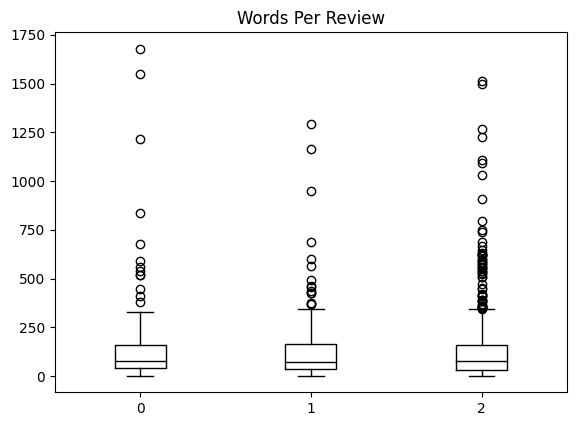

In [ ]:
df_final["Words Per Review"] = df_final["Review"].str.split().apply(len)
df_final.boxplot("Words Per Review", by="Label_int", grid=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

## Reviews contain a large number of words that exceed the maximum token limit of DistilBERT (which is 512 tokens), We will need to truncate them. DistilBERT can only process sequences up to 512 tokens, so any review that is longer than that should be truncated to avoid issues.

In [ ]:
## Balancing the Dataset Using Random Oversampling

X = df_final['Review']
y = df_final['Label_int']

X = X.values.reshape(-1, 1)
ros = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled arrays back to a DataFrame for further processing
oversampled_df = pd.DataFrame({'review': X_resampled.flatten(), 'label': y_resampled})

print(oversampled_df['label'].value_counts())


label
2    542
1    542
0    542
Name: count, dtype: int64


In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

In [ ]:
# Split the DataFrame into training and test sets
train_df, test_df = train_test_split(oversampled_df, test_size=0.2, stratify=oversampled_df['label'])

# Convert DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['review', 'label', '__index_level_0__'],
        num_rows: 1300
    })
    test: Dataset({
        features: ['review', 'label', '__index_level_0__'],
        num_rows: 326
    })
})


In [ ]:
dataset_dict = dataset_dict.remove_columns(['__index_level_0__'])

In [ ]:
print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['review', 'label'],
        num_rows: 1300
    })
    test: Dataset({
        features: ['review', 'label'],
        num_rows: 326
    })
})


In [ ]:
## Subword Tokenization

from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


**Huggingface Transformers provides a convenient AutoTokenizer class that allows us to quickly load the tokenizer associated with a pretrained model.**

In [ ]:
## Tokenization of Text Data for Model Input"

def tokenize(batch):
    return tokenizer(batch["review"], padding=True, truncation=True)

dataset_encoded = dataset_dict.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/1300 [00:00<?, ? examples/s]

Map:   0%|          | 0/326 [00:00<?, ? examples/s]

* **padding=True will pad the examples with zeros to the size of the longest one
in a batch, and truncation=True will truncate the examples to the model’s maximum context size.**

* **we’ve set batch_size=None, so that our tokenize() function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally.**

In [ ]:
dataset_encoded
print(dataset_encoded ["train"].column_names)


['review', 'label', 'input_ids', 'attention_mask']


**The attention mask allows the model to ignore the padded parts of the input**


## Loding Pretrained Model

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

# Define device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_labels = 3  # We have 3 sentiment labels (positive, neutral, negative)
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))  # Move the model to the device


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}


In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=3,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none"  # Disable WandB and Hugging Face Hub reporting
)

**Logging Steps:** Calculates how often (in terms of steps) to log training
information. It divides the total number of training samples by the batch size.

**Logging Steps:** Calculates how often (in terms of steps) to log training information. It divides the total number of training samples by the batch size.

**Training Arguments:** Initializes a TrainingArguments object to define various settings for the training process. The first argument specifies where to save the model outputs.

**Epochs:** Specifies that the model will be trained for 2 complete passes over the training dataset.

**Learning Rate:** Sets the learning rate for the optimizer to 2e-5, controlling the size of weight updates during training.

**Evaluation Batch Size:** Sets the batch size for evaluation (if applicable) to the same value as the training batch size.

**Weight Decay:** Applies L2 regularization with a factor of 0.01, helping to prevent overfitting by penalizing large weights.

**TQDM Progress Bar:** If set to True, disables the TQDM progress bar during training. By default, it shows progress.

**Logging Steps:** Uses the previously calculated logging_steps to determine how often to log training metrics.

**Log Level:** Sets the logging level to "error", meaning that only error messages will be displayed.

**Reporting:** Disables reporting to external tools like WandB (Weights & Biases) and Hugging Face Hub during training.


In [ ]:
## Training the Model with the Hugging Face Trainer API

from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,  # Optional, can be removed if not needed
    train_dataset=dataset_encoded["train"],
    tokenizer=tokenizer
)

trainer.train()


Step,Training Loss
40,1.011000
80,0.678700
120,0.467900


TrainOutput(global_step=123, training_loss=0.7127354765326027, metrics={'train_runtime': 178.7682, 'train_samples_per_second': 21.816, 'train_steps_per_second': 0.688, 'total_flos': 516632067993600.0, 'train_loss': 0.7127354765326027, 'epoch': 3.0})

In [ ]:
preds_output = trainer.predict(dataset_encoded["test"])

In [ ]:
preds_output.metrics

{'test_loss': 0.4446773827075958,
 'test_accuracy': 0.8895705521472392,
 'test_f1': 0.889913437224338,
 'test_runtime': 5.9204,
 'test_samples_per_second': 55.063,
 'test_steps_per_second': 1.858}

In [ ]:
import numpy as np
y_preds = np.argmax(preds_output.predictions, axis=1)

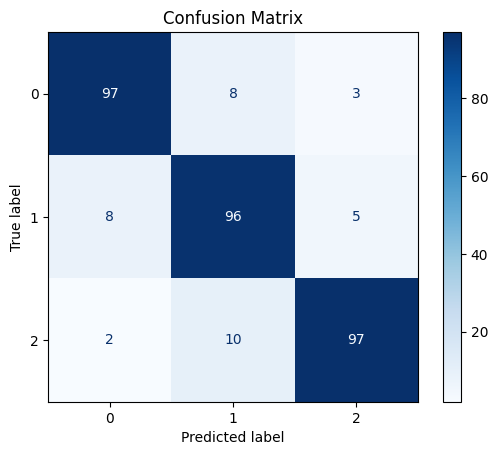

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# True labels from the test set
y_test_true = dataset_encoded['test']['label']

# Compute the confusion matrix
cm = confusion_matrix(y_test_true, y_preds)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # You can choose different color maps
plt.title('Confusion Matrix')
plt.show()